# A.1题 问题解析与模型内核构建

## 问题简述

某工厂拥有5种性能各异的机床，并且拥有7种零件的生产权。<br>
<br>
不同零件生产需要的时间不一致，同时每个零件需要的工序受到<font size=5>机床维修情况（该机床本月不能投入生产)</font><br>这一情况的约束<br>
<br>
不同零件每月的销售受到限额，同时<font size=5>库存存在上限（<font color = red>100</font>），六月底每个零件必须库存<font color=red>60</font>.</font><br>
<br>
目的是求解这种情况下<font size=5><font color=red>最大利润</font></font>

## 数据可视化分析

In [105]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'simHei']   # 显示中文
plt.rcParams['axes.unicode_minus'] = False      # 解决负号问题

In [106]:
def transpose_list(matrix):
    if not matrix:
        return []
    
    rows = len(matrix)
    cols = len(matrix[0])
    
    transposed_matrix = []
    for j in range(cols):
        transposed_row = []
        for i in range(rows):
            transposed_row.append(matrix[i][j])
        transposed_matrix.append(transposed_row)
    
    return transposed_matrix

零件销售最大销售数量

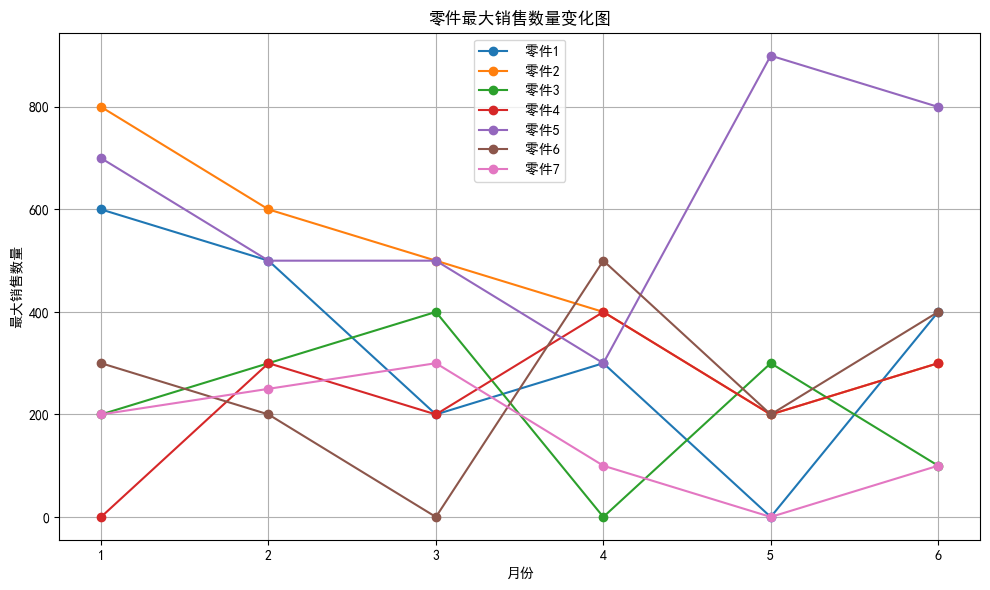

In [108]:
import matplotlib.pyplot as plt
import numpy as np
F=[[600, 800, 200, 0, 700, 300, 200],
     [500, 600, 300, 300, 500, 200, 250],
     [200, 500, 400, 200, 500, 0, 300],
     [300, 400, 0, 400, 300, 500, 100],
     [0, 200, 300, 200, 900, 200, 0],
     [400, 300, 100, 300, 800, 400, 100]]
data=np.array(transpose_list(F))
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 零件{i+1}')
plt.xlabel('月份')
plt.ylabel('最大销售数量')
plt.title('零件最大销售数量变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

零件的加工时间

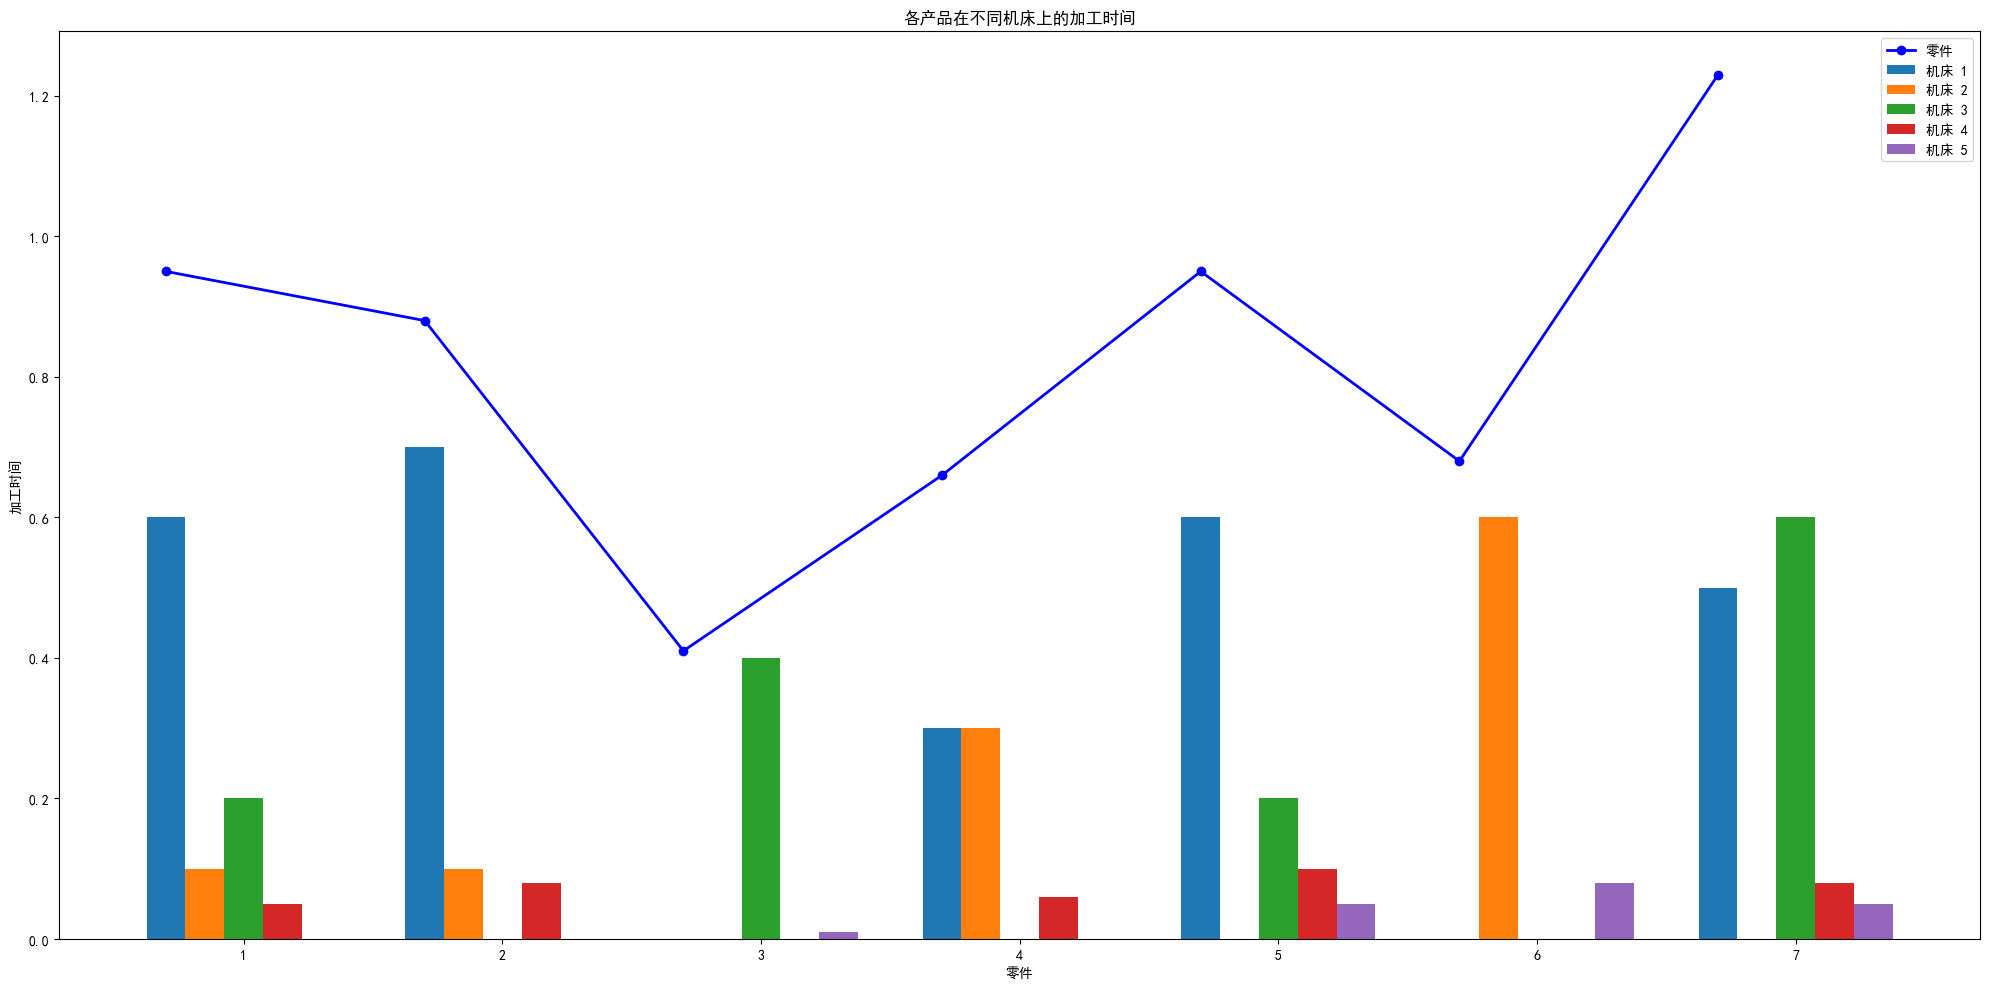

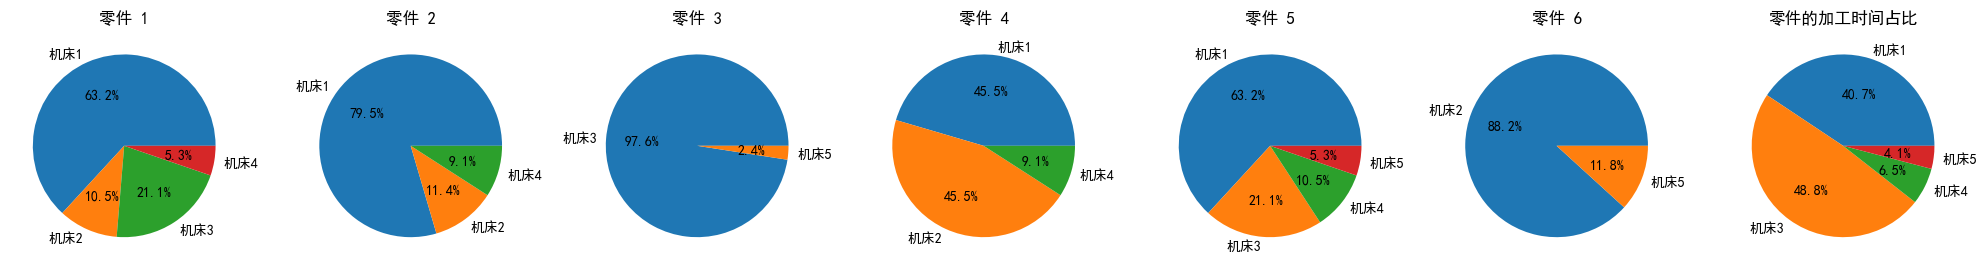

In [119]:
time_data = [
    [0.6, 0.7, 0, 0.3, 0.6, 0, 0.5], 
    [0.1, 0.1, 0, 0.3, 0, 0.6, 0],    
    [0.2, 0, 0.4, 0, 0.2, 0, 0.6],  
    [0.05, 0.08, 0, 0.06, 0.1, 0, 0.08],
    [0, 0, 0.01, 0, 0.05, 0.08, 0.05]   
]
machine_flag=[
    ['机床1','机床2','机床3','机床4'],
    ['机床1','机床2','机床4'],
    ['机床3','机床5'],
    ['机床1','机床2','机床4'],
    ['机床1','机床3','机床4','机床5'],
    ['机床2','机床5'],
    ['机床1','机床3','机床4','机床5'],
]
num_products = len(time_data)
num_machines = len(time_data[0])

positions = range(num_machines)
bar_width = 0.15

plt.figure(figsize=(20, 10))
for i in range(num_products):
    plt.bar([p + bar_width*i for p in positions], time_data[i], width=bar_width, label=f'机床 {i+1}')
time_machine=[]
for j in range(7):
    time_machine.append(sum(time_data[i][j] for i in range(5)))

# Adding labels and title
plt.xlabel('零件')
plt.ylabel('加工时间')
plt.title('各产品在不同机床上的加工时间')
plt.xticks([p + bar_width*(num_products-1)/2 for p in positions], range(1, num_machines + 1))
plt.plot(range(num_machines), time_machine, color='blue', marker='o', linestyle='-', linewidth=2, label=f'零件')
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()


time_data=transpose_list(time_data)
time_data=[[time for time in time_data[j] if time>0] for j in range(7)]
num_parts = len(time_data)
fig, axs = plt.subplots(1, num_parts, figsize=(20, 3))

for i in range(num_parts):
    axs[i].pie(time_data[i], labels=machine_flag[i], autopct='%1.1f%%')
    axs[i].set_title(f'零件 {i+1}')
plt.title('零件的加工时间占比')
plt.tight_layout()
plt.show()


不同月份的可用机床数

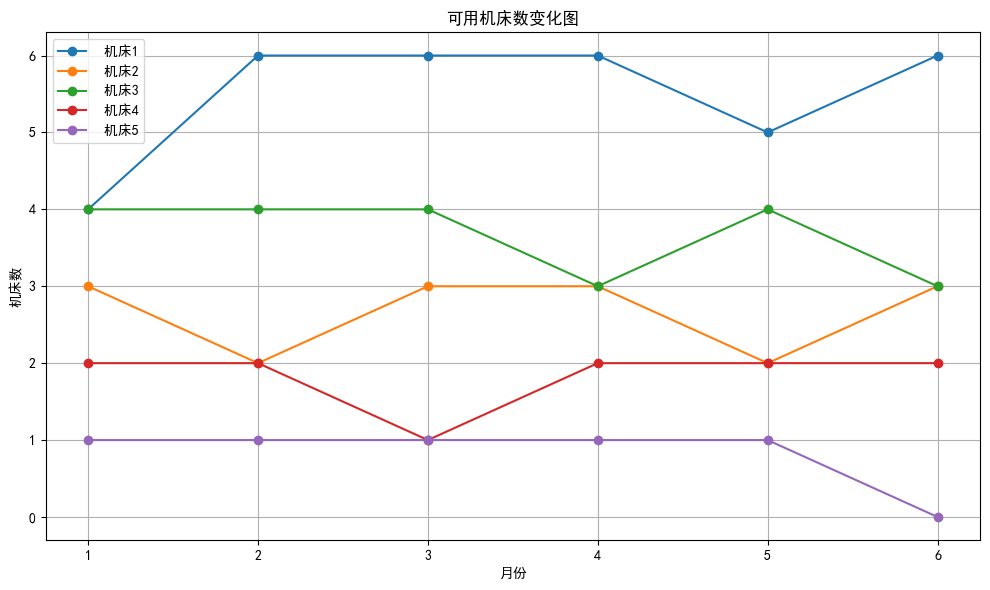

In [120]:
Machine = [[4, 3, 4, 2, 1],
            [6, 2, 4, 2, 1],
            [6, 3, 4, 1, 1],
            [6, 3, 3, 2, 1],
            [5, 2, 4, 2, 1],
            [6, 3, 3, 2, 0]] 
data=np.array(transpose_list(Machine))
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 机床{i+1}')
plt.xlabel('月份')
plt.ylabel('机床数')
plt.title('可用机床数变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

每月等效机床时长

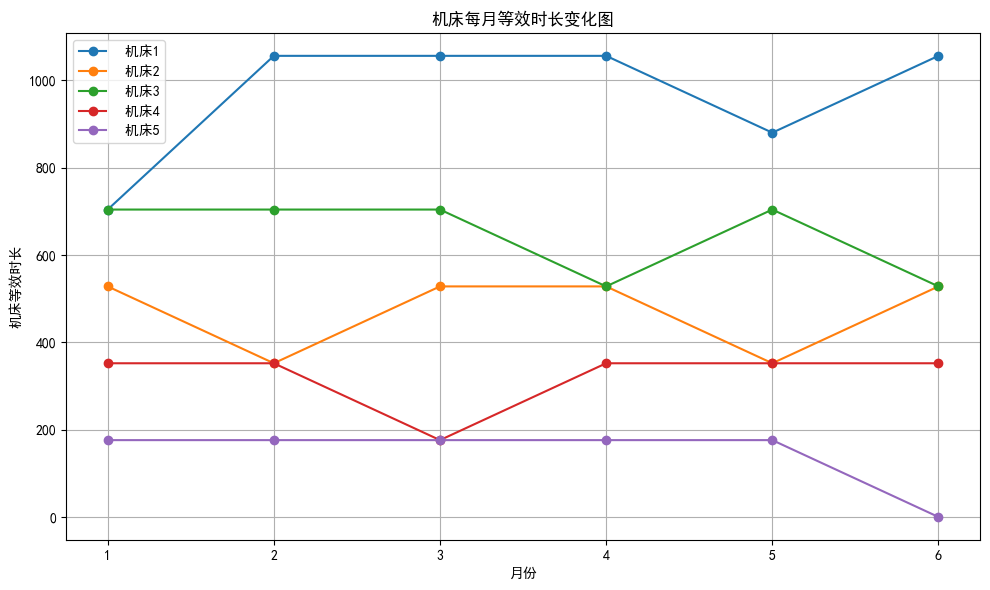

In [121]:
Machine = [[4, 3, 4, 2, 1],
            [6, 2, 4, 2, 1],
            [6, 3, 4, 1, 1],
            [6, 3, 3, 2, 1],
            [5, 2, 4, 2, 1],
            [6, 3, 3, 2, 0]]  
data=np.array(transpose_list(Machine))*22*8
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 机床{i+1}')
plt.xlabel('月份')
plt.ylabel('机床等效时长')
plt.title('机床每月等效时长变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 模型内核

采用<font size=4 color=red>线性规划</font>模型进行计算<br>
分为三部分
<br>
1.定义<font color = red>常量</font><br>
2.定义<font color =  red>目标函数</font><br>
3.定义<font color =  red>约束函数</font><br>

### 代码实现

导入需要的求解库<br>
使用<font  size = 4>  pulp  </font>进行求解

In [29]:
import pulp

定义模型内核所需要的常量

In [30]:
hours = 8  # 每天可工作时长为8h
days = 22  # 每月工作22天
fine = 0.5  # 每月库存费



price = [10, 9, 3, 5, 11, 9, 8]  # 第i件商品可获得的利润



F = [[600, 800, 200, 0, 700, 300, 200],
     [500, 600, 300, 300, 500, 200, 250],
     [200, 500, 400, 200, 500, 0, 300],
     [300, 400, 0, 400, 300, 500, 100],
     [0, 200, 300, 200, 900, 200, 0],
     [400, 300, 100, 300, 800, 400, 100]]  # 第i月，第j个商品的销售限额



Time = [[0.6, 0.7, 0, 0.3, 0.6, 0, 0.5],
         [0.1, 0.1, 0, 0.3, 0, 0.6, 0],
         [0.2, 0, 0.4, 0, 0.2, 0, 0.6],
         [0.05, 0.08, 0, 0.06, 0.1, 0, 0.08],
         [0, 0, 0.01, 0, 0.05, 0.08, 0.05]] # 第j个商品在第num号机床上所需的加工时间




Machine = [[4, 3, 4, 2, 1],
            [6, 2, 4, 2, 1],
            [6, 3, 4, 1, 1],
            [6, 3, 3, 2, 1],
            [5, 2, 4, 2, 1],
            [6, 3, 3, 2, 0]]  # 第i月，第num号机床的数量

<FONT SIZE =5>定义问题所采用的变量</FONT>:<br><BR>
K:每个月<font color=red>月初</font>时利润的累计量<br>
N:每个月零件的销售量<BR>
M:每个月零件的生产量<BR>
X:每个月<font color=red>月初</font>时利润的累计量<br>

In [31]:
# 变量定义

K=[pulp.LpVariable(f'k_{i}', lowBound=0) for i in range(6)]
N=[[pulp.LpVariable(f'N_{j}_{i}', lowBound=0, cat='Integer') for j in range(7)] for i in range(6)]
M=[[pulp.LpVariable(f'M_{j}_{i}', lowBound=0, cat='Integer') for j in range(7)] for i in range(6)]
X=[[pulp.LpVariable(f'X_{j}_{i}', lowBound=0, cat='Integer') for j in range(7)] for i in range(6)]

问题创建

In [32]:
# 创建线性规划问题
prob = pulp.LpProblem("Maximize Profit", pulp.LpMaximize)

C:\Users\12780\AppData\Roaming\Python\Python39\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


<font size=6 color = red>目标函数：</font><br><br>
Max Z = $K_6$   +   $\sum^7_j$ $_=$ $_1$   $N_(j,6)$    *    $price_i$    -   $\sum$ fine * $X_(j,i)$<br><br>
六月末利润=六月初利润+六月销售利润-六月初的库存费

In [33]:
# 目标函数
prob += K[5] + sum(N[5][j] * price[j] for j in range(7)) - fine * sum(X[5][j] for j in range(7))

<font size=6 color = red>约束函数：</font><br><br>

0 $\leq$ $X_(j,i)$ $\leq$ 100 

$ X_(j,0) $ = 0

$X_(j,6)$ + $M_(j,6)$ - $N_(j,6)$ = 60

$X_(j,i+1)$ = $X_(j,i)$ + $M_(j,i)$ - $N_(j,i)$

$ K_0 $ = 0

$K_i$ $_+$ $_1$ = $K_i$ + $\sum^7_j$ $_=$ $_1$   $N_(j,i)$ *  $price_i$  -  $\sum^7_j$ $_=$ $_1$ fine * $X_(j,i)$

$N_(j,i)$ $\leq$ $F_(j,i)$

$N_(j,i)$ $\leq$ $X_(j,i)$ + $M_(j,i) $

$Time(i,num)$ * $M_(j,i)$ $\leq$ hours  *  days  *   $Machine_(num,i)$



In [34]:
for j in range(7):
    prob += X[5][j] + M[5][j] - N[5][j] == 60

数值范围约束

In [35]:
# 1月初不存在零件库存量
for j in range(7):
    prob += X[0][j] == 0
# 初始利润为0
prob += K[0]==0

In [36]:
for i in range(6):
    for j in range(7):
        prob += X[i][j]<=100
        prob += X[i][j]>=0
        prob += M[i][j]>=0
        prob += N[i][j]>=0

递推构造下一个月的条件

In [37]:
for i in range(5):
    for j in range(7):
        prob += X[i+1][j]==X[i][j]+M[i][j]-N[i][j]

In [38]:
for i in range(5):
    prob += K[i+1]==K[i]+sum(N[i][j]*price[j] for j in range(7))-sum(X[i][j]*fine for j in range(7))

In [39]:
for i in range(6):
    for j in range(7):
        prob += N[i][j]<=F[i][j]
        prob += N[i][j]<=X[i][j]+M[i][j]

检验生产能力

In [40]:
for i in range(6):
    for num in range(5):
        prob += sum(Time[num][j]*M[i][j] for j in range(7)) <= hours*days*Machine[i][num]

### 求解

In [41]:
prob.solve()

1

## 结果展示

每月月初利润（不含最终利润）

########################################################
第1月月初利润量为： 0.0
第2月月初利润量为： 15732.0
第3月月初利润量为： 35529.0
第4月月初利润量为： 52129.0
第5月月初利润量为： 69329.0
第6月月初利润量为： 84729.0
########################################################


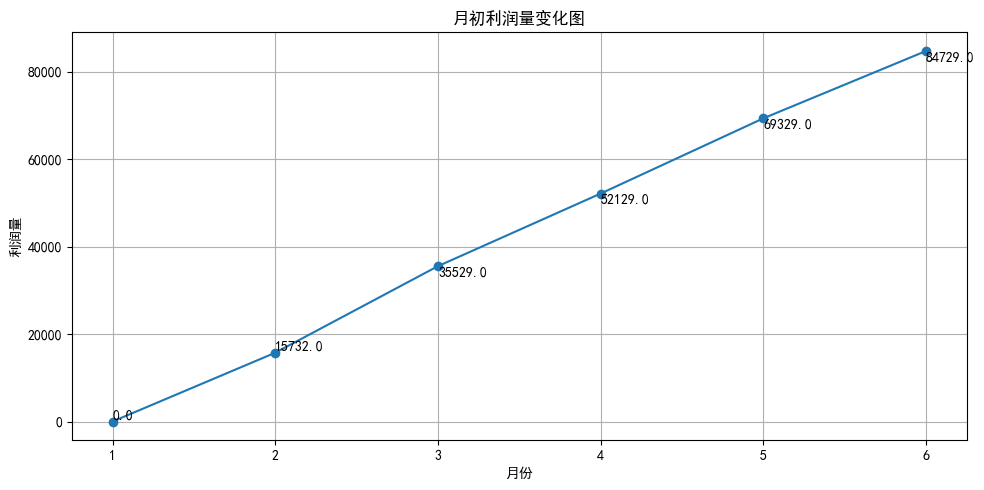

In [54]:
print("########################################################")
for i in range(6):
    print(f"第{i+1}月月初利润量为：",K[i].value())
print("########################################################")
K_value=[]
for i in K:
    K_value.append(i.value())
K_value=np.array(K_value)
month=range(1,7)
plt.figure(figsize=(10, 5))
plt.plot(month, K_value, marker='o',)
for i, txt in enumerate(K_value):
    plt.text(month[i], K_value[i], f'{txt}', verticalalignment='bottom' if i < 2 else 'top')
plt.title('月初利润量变化图')
plt.xlabel('月份')
plt.ylabel('利润量')
plt.grid(True)
plt.xticks(month)
plt.tight_layout()
plt.show()

每月零件制造量

########################################################
第1月制造量如下：
零件1:  470.0||零件2:  0.0||零件3:  200.0||零件4:  0.0||零件5:  700.0||零件6:  300.0||零件7:  4.0|| 
第2月制造量如下：
零件1:  500.0||零件2:  345.0||零件3:  300.0||零件4:  300.0||零件5:  500.0||零件6:  200.0||零件7:  249.0|| 
第3月制造量如下：
零件1:  200.0||零件2:  500.0||零件3:  400.0||零件4:  200.0||零件5:  500.0||零件6:  0.0||零件7:  300.0|| 
第4月制造量如下：
零件1:  300.0||零件2:  400.0||零件3:  0.0||零件4:  400.0||零件5:  300.0||零件6:  500.0||零件7:  100.0|| 
第5月制造量如下：
零件1:  0.0||零件2:  200.0||零件3:  400.0||零件4:  200.0||零件5:  1000.0||零件6:  300.0||零件7:  100.0|| 
第6月制造量如下：
零件1:  460.0||零件2:  360.0||零件3:  0.0||零件4:  360.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
########################################################


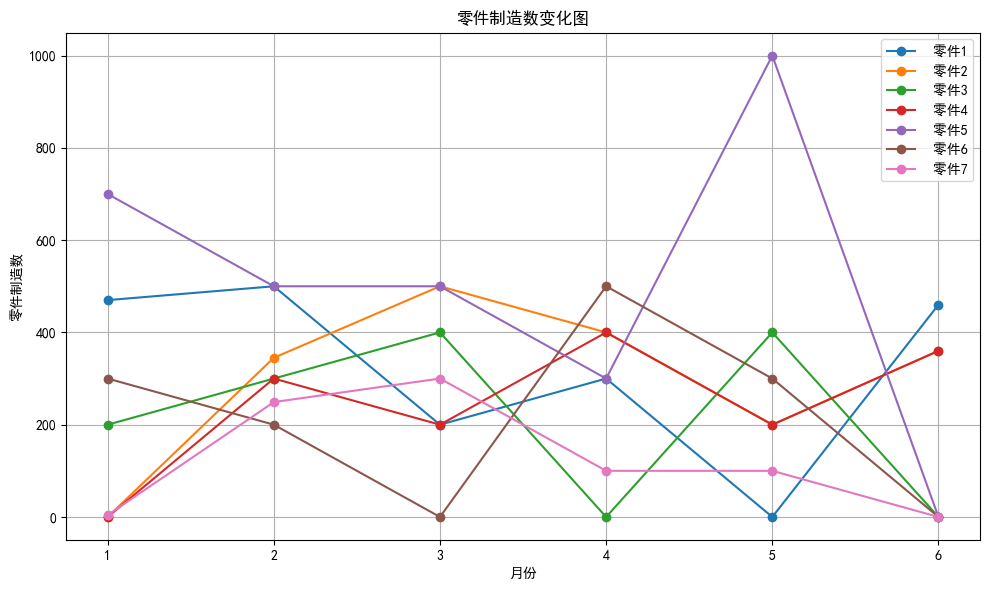

In [59]:
print("########################################################")
for i in range(6):
    print(f"第{i+1}月制造量如下：")
    for j in range(7):
        print(f"零件{j+1}: ",M[i][j].value(),end='||')
    print(" ")
print("########################################################")
M_value=[]
for i in range(6):
    M_value.append([M[i][j].value() for j in range(7)])
M_value=np.array(transpose_list(M_value))
data=M_value
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 零件{i+1}')
plt.xlabel('月份')
plt.ylabel('零件制造数')
plt.title('零件制造数变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


每月零件销售量

########################################################
第1月销售量量如下：
零件1:  470.0||零件2:  0.0||零件3:  200.0||零件4:  0.0||零件5:  700.0||零件6:  300.0||零件7:  4.0|| 
第2月销售量量如下：
零件1:  500.0||零件2:  345.0||零件3:  300.0||零件4:  300.0||零件5:  500.0||零件6:  200.0||零件7:  249.0|| 
第3月销售量量如下：
零件1:  200.0||零件2:  500.0||零件3:  400.0||零件4:  200.0||零件5:  500.0||零件6:  0.0||零件7:  300.0|| 
第4月销售量量如下：
零件1:  300.0||零件2:  400.0||零件3:  0.0||零件4:  400.0||零件5:  300.0||零件6:  500.0||零件7:  100.0|| 
第5月销售量量如下：
零件1:  0.0||零件2:  200.0||零件3:  300.0||零件4:  200.0||零件5:  900.0||零件6:  200.0||零件7:  0.0|| 
第6月销售量量如下：
零件1:  400.0||零件2:  300.0||零件3:  40.0||零件4:  300.0||零件5:  40.0||零件6:  40.0||零件7:  40.0|| 
########################################################


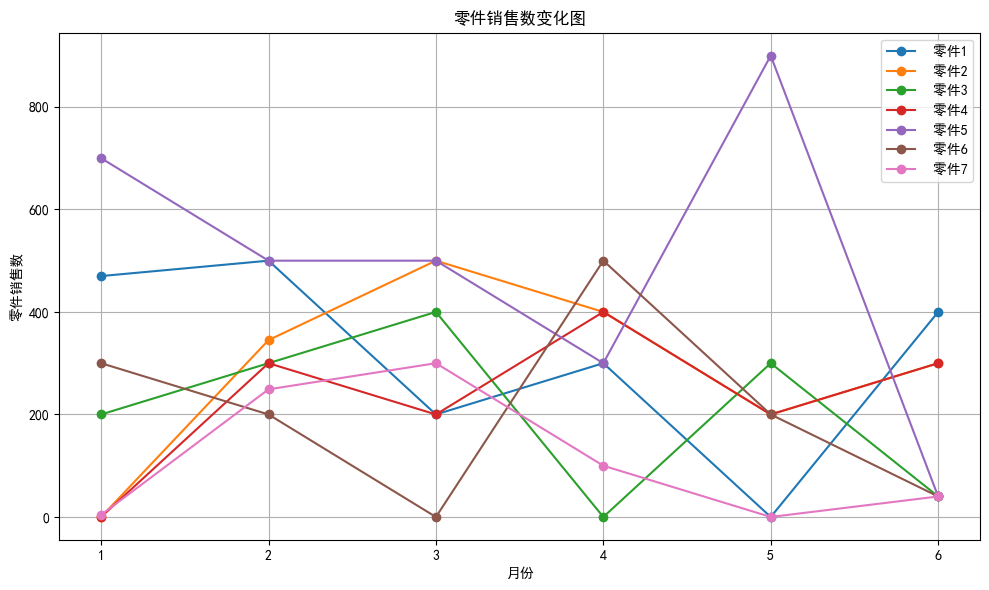

In [60]:
print("########################################################")
for i in range(6):
    print(f"第{i+1}月销售量量如下：")
    for j in range(7):
        print(f"零件{j+1}: ",N[i][j].value(),end='||')
    print(" ")
print("########################################################")
N_value=[]
for i in range(6):
    N_value.append([N[i][j].value() for j in range(7)])
N_value=np.array(transpose_list(N_value))
data=N_value
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 零件{i+1}')
plt.xlabel('月份')
plt.ylabel('零件销售数')
plt.title('零件销售数变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

每月月初零件剩余量

########################################################
第1月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  0.0||零件4:  0.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
第2月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  0.0||零件4:  0.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
第3月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  0.0||零件4:  0.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
第4月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  0.0||零件4:  0.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
第5月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  0.0||零件4:  0.0||零件5:  0.0||零件6:  0.0||零件7:  0.0|| 
第6月月初零件剩余量如下：
零件1:  0.0||零件2:  0.0||零件3:  100.0||零件4:  0.0||零件5:  100.0||零件6:  100.0||零件7:  100.0|| 
########################################################


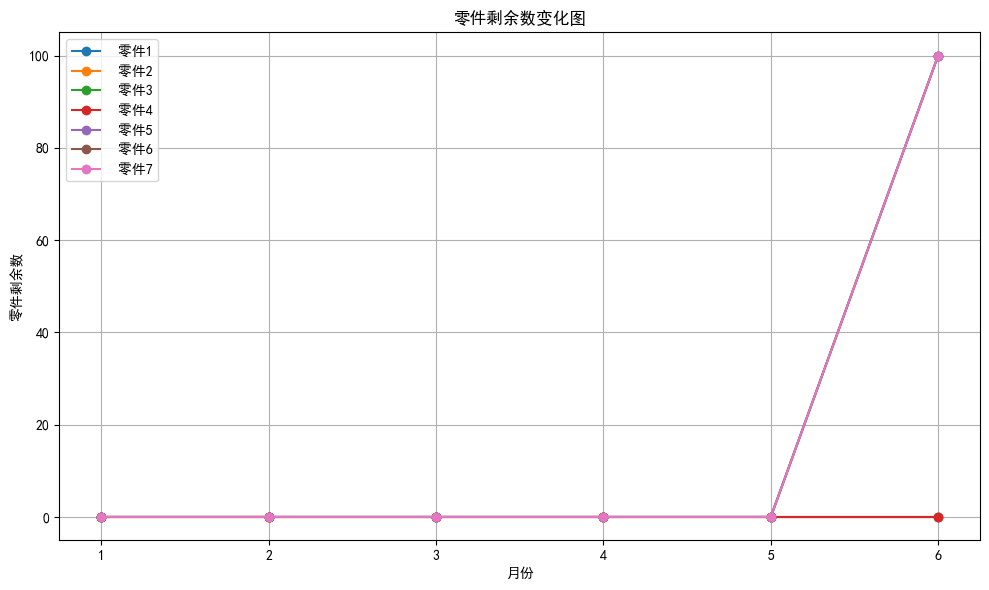

In [62]:
print("########################################################")
for i in range(6):
    print(f"第{i+1}月月初零件剩余量如下：")
    for j in range(7):
        print(f"零件{j+1}: ",X[i][j].value(),end='||')
    print(" ")
print("########################################################")
X_value=[]
for i in range(6):
    X_value.append([X[i][j].value() for j in range(7)])
X_value=np.array(transpose_list(X_value))
data=X_value
months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 零件{i+1}')
plt.xlabel('月份')
plt.ylabel('零件剩余数')
plt.title('零件剩余数变化图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

每月所得利润

In [72]:
FIT_MOUTH=[]
K_value=[]
for i in K:
    K_value.append(pulp.value(i))
K_value.append(pulp.value(prob.objective))
for i in range(6):
    FIT_MOUTH.append(K_value[i+1]-K_value[i])
FIT_MACHINE=[]
N_value=np.array(transpose_list(N_value.tolist()))


In [84]:
for i in range(6):
    # 计算每个 i 对应的内部循环的结果，得到一个包含7个元素的列表
    result = [N_value[i][j] * price[j] for j in range(7)]
    # 将结果列表添加到 FIT_MACHINE 列表中
    FIT_MACHINE.append(result)
FIT_MACHINE=np.array(FIT_MACHINE)


[[4700.0, 0.0, 600.0, 0.0, 7700.0, 2700.0, 32.0], [5000.0, 3105.0, 900.0, 1500.0, 5500.0, 1800.0, 1992.0], [2000.0, 4500.0, 1200.0, 1000.0, 5500.0, 0.0, 2400.0], [3000.0, 3600.0, 0.0, 2000.0, 3300.0, 4500.0, 800.0], [0.0, 1800.0, 900.0, 1000.0, 9900.0, 1800.0, 0.0], [4000.0, 2700.0, 120.0, 1500.0, 440.0, 360.0, 320.0]]


In [ ]:
data=FIT_MACHINE.transpose()

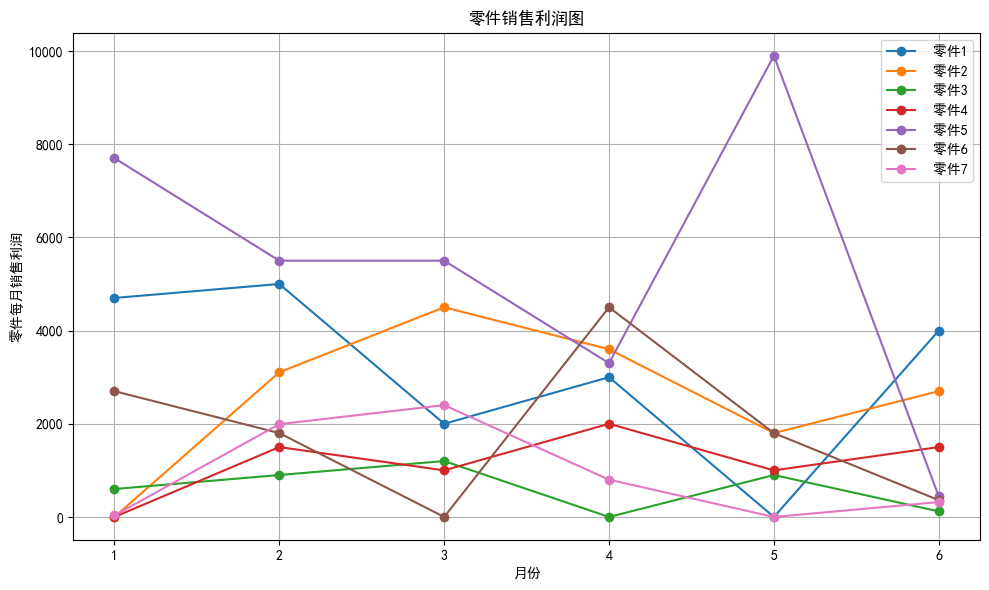

In [88]:

months = np.arange(1, 7) 
plt.figure(figsize=(10, 6))
for i in range(data.shape[0]):
    plt.plot(months, data[i], marker='o', label=f' 零件{i+1}')
plt.xlabel('月份')
plt.ylabel('零件每月销售利润')
plt.title('零件销售利润图')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

各个零件每月销售额

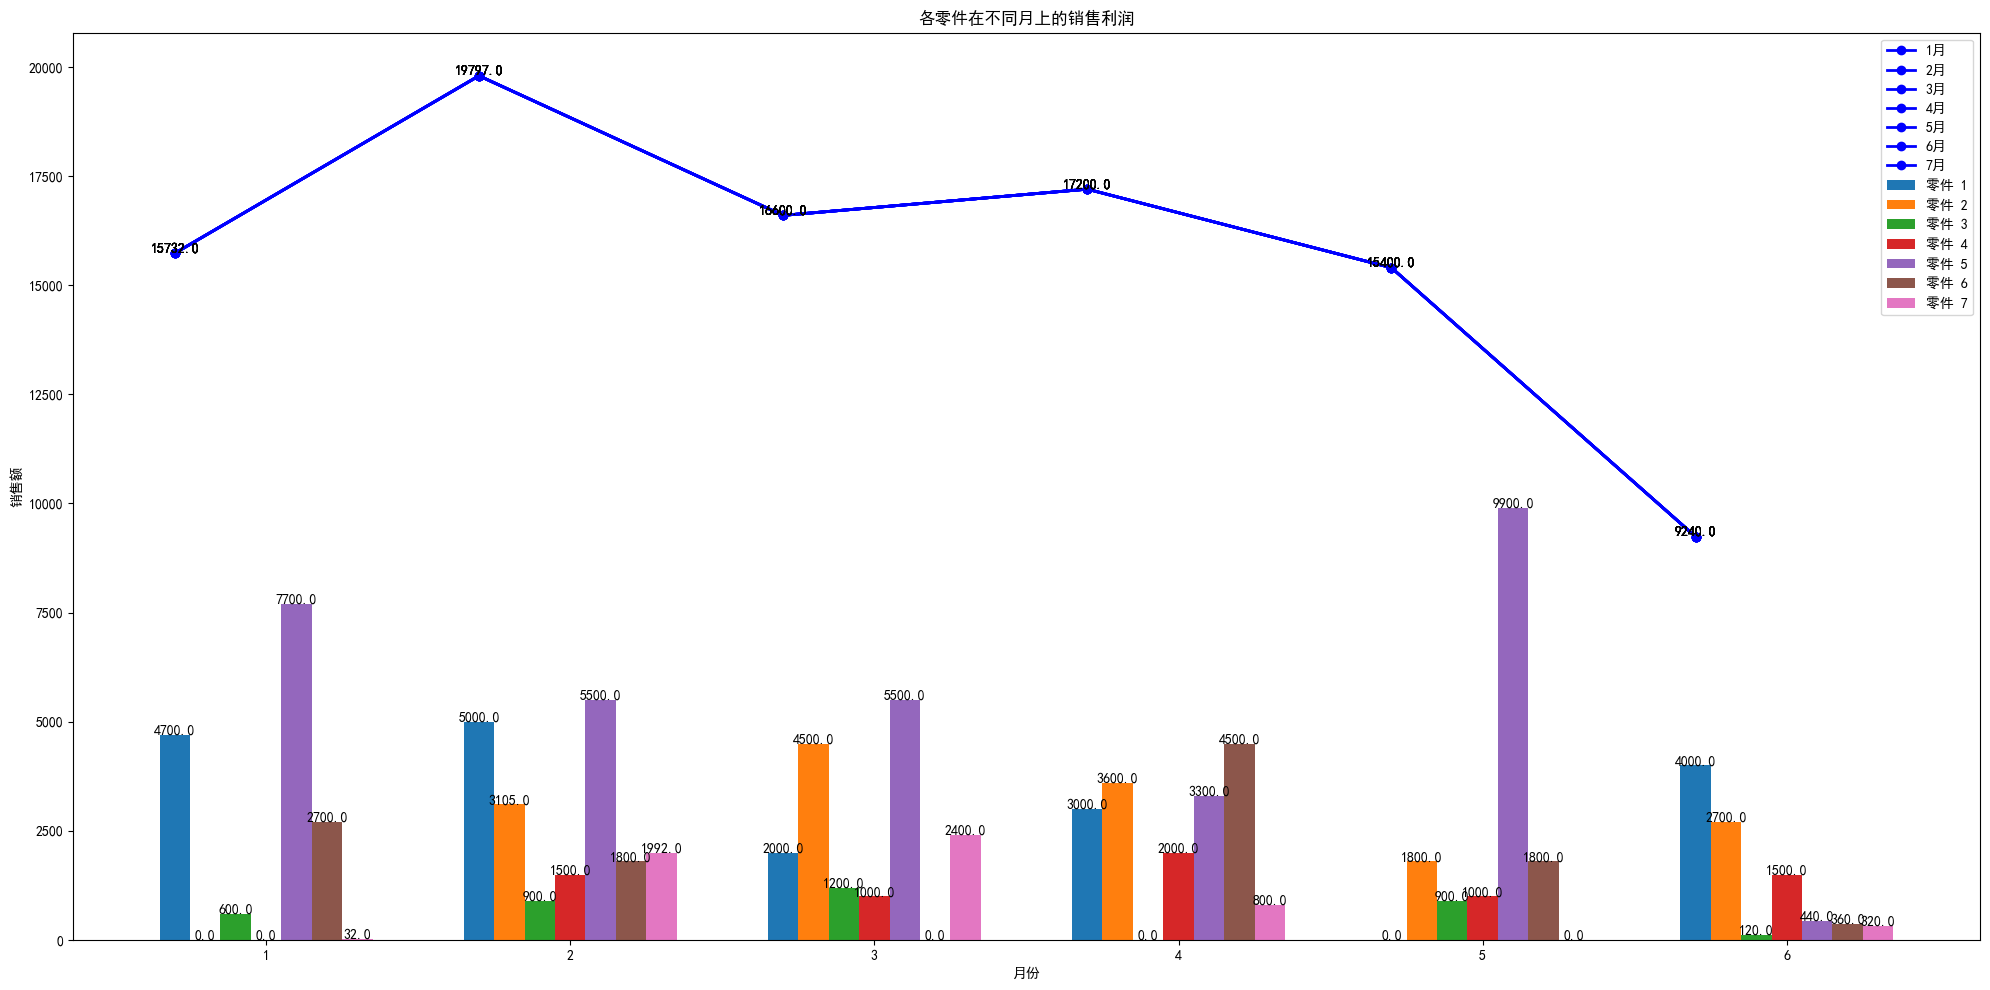

In [99]:
bar_width = 0.1

plt.figure(figsize=(20, 10))
for i in range(num_products):
    # 绘制柱状图
    plt.bar([p + bar_width*i for p in range(num_machines)], data[i], width=bar_width, label=f'零件 {i+1}')
    
    # 在每个柱状图上显示对应的数字
    for j in range(num_machines):
        plt.text(j + bar_width*i, data[i][j] + 10, str(data[i][j]), ha='center')
    plt.plot(range(num_machines), FIT_MOUTH, color='blue', marker='o', linestyle='-', linewidth=2, label=f'{i+1}月')
    for i, txt in enumerate(FIT_MOUTH):
        plt.text(i, FIT_MOUTH[i] + 25, str(txt), ha='center', color='black')
# 添加标签和标题
plt.xlabel('月份')
plt.ylabel('销售额')
plt.title('各零件在不同月上的销售利润')
plt.xticks([p + bar_width*(num_products-1)/2 for p in range(num_machines)], range(1, num_machines + 1))
plt.legend()
plt.tight_layout()
plt.show()

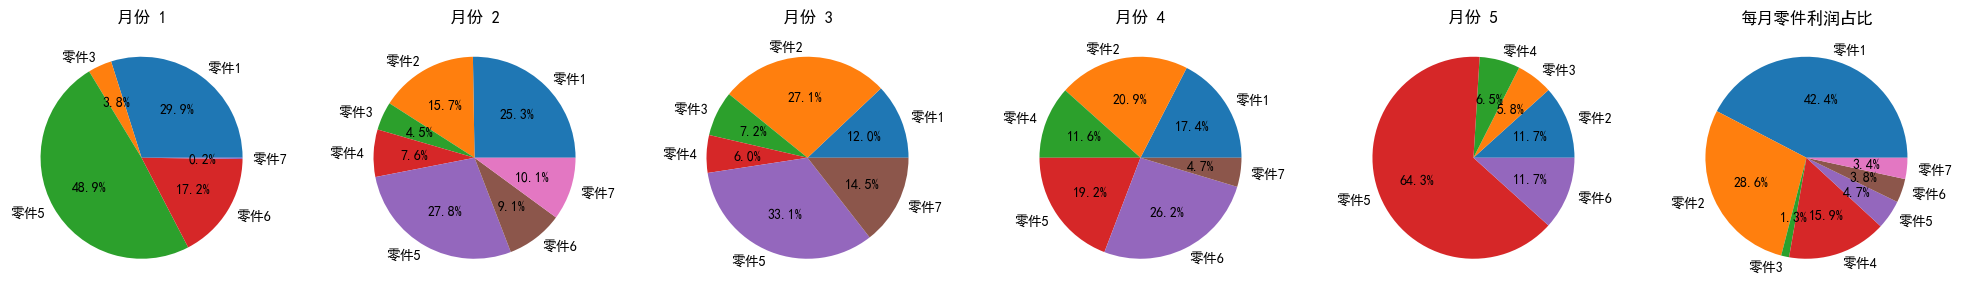

In [104]:
time_data=[[time for time in FIT_MACHINE[j] if time>0] for j in range(6)]
machine_flag=[
    ['零件1','零件3','零件5','零件6','零件7'],
    ['零件1','零件2','零件3','零件4','零件5','零件6','零件7'],
    ['零件1','零件2','零件3','零件4','零件5','零件7'],
    ['零件1','零件2','零件4','零件5','零件6','零件7'],
    ['零件2','零件3','零件4','零件5','零件6'],
    ['零件1','零件2','零件3','零件4','零件5','零件6','零件7'],
]
num_parts = len(time_data)
fig, axs = plt.subplots(1, num_parts, figsize=(20, 3))

for i in range(num_parts):
    axs[i].pie(time_data[i], labels=machine_flag[i], autopct='%1.1f%%')
    axs[i].set_title(f'月份 {i+1}')
plt.title('每月零件利润占比')
plt.tight_layout()
plt.show()


### 结果总结

In [65]:
print("Status:", pulp.LpStatus[prob.status])
print("Optimal Value (Maximum Profit) =", pulp.value(prob.objective))

Status: Optimal
Optimal Value (Maximum Profit) = 93969.0


### MAX_FIT 93969

# 使用已实现内核快速复现

将本线性规划问题集成为自定义内核core的LinearProblem库

In [5]:
from core import LinearProblem
price = [10, 9, 3, 5, 11, 9, 8]  # 第i件商品可获得的利润



F = [[600, 800, 200, 0, 700, 300, 200],
     [500, 600, 300, 300, 500, 200, 250],
     [200, 500, 400, 200, 500, 0, 300],
     [300, 400, 0, 400, 300, 500, 100],
     [0, 200, 300, 200, 900, 200, 0],
     [400, 300, 100, 300, 800, 400, 100]]  # 第i月，第j个商品的销售限额



Time = [[0.6, 0.7, 0, 0.3, 0.6, 0, 0.5],
         [0.1, 0.1, 0, 0.3, 0, 0.6, 0],
         [0.2, 0, 0.4, 0, 0.2, 0, 0.6],
         [0.05, 0.08, 0, 0.06, 0.1, 0, 0.08],
         [0, 0, 0.01, 0, 0.05, 0.08, 0.05]] # 第j个商品在第num号机床上所需的加工时间




Machine = [[4, 3, 4, 2, 1],
            [6, 2, 4, 2, 1],
            [6, 3, 4, 1, 1],
            [6, 3, 3, 2, 1],
            [5, 2, 4, 2, 1],
            [6, 3, 3, 2, 0]]  # 第i月，第num号机床的数量

problem=LinearProblem.LinearCore()
problem.reset_f(F)
problem.reset_machine(Machine)
problem.reset_price(price)
problem.reset_time(Time)
problem.solveP()

C:\Users\12780\AppData\Roaming\Python\Python39\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


93969.0